<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/cfproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Harmonic functions for movie animation
* Press the **Open in Colab** button above in
  order to run the code in this notebook.
  You will be prompted to first get a copy
  of this notebook to your personal google drive.
* A first draft of a Google Coab notebook for
  the Complex functions course projects
* This is just a proof of concept and ideas that can
  be used for helping the students with this project
* Some of the stuff is meant for the instructors and may
  not be passed to students
* The intention is to start a discussion on what we need
  to present to the students.
* The **cfclon** project (suggested short name) is in the
  context of an an undergraduate course on comple functions,
  and its purpose is to demonstrate how theoretical topic
  such as "Harmonic Functions" is practically used in the
  graphical movies industery (such as **Pixar**)
* Recommended resources:
  1. https://www.ams.org/publicoutreach/feature-column/fcarc-harmonic
  2. https://graphics.pixar.com/library/HarmonicCoordinates/paper.pdf
  3. https://www.cs.jhu.edu/~misha/Fall07/Papers/Joshi07.pdf
  4. https://www.cs.huji.ac.il/~danix/mvclone/files/mvc-final-opt.pdf
  5. https://www.samyzaf.com/technion/cfit/cf.pdf


## Google Colab Notebook
* Beginners **Google Colab (Jupyter notebook)**,
  YouTube course:  
  [Google Colab Tutorial for Beginners](https://www.youtube.com/watch?v=iMlMfrXJYSg)

* [Official Google Colaboratory Tutorial](
  https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj)

* To avoid variable namespace corruption (after a long
  session usage), from time to time restart your
  notebook from the **Runtime menu button**:
  *Disconnect and delete runtime*  
  <IMG src="https://samyzaf.com/cfproj/colab1.jpg" width=500 align="center"/>

* After restart, make sure to run all code cells
  one by one according to their order.

## Installation
* Run the following cell to install and activate
  the **cfclon** package.

In [1]:
%%capture
%pip install https://samyzaf.com/cfclon-35.zip
from cfclon import *
plt.rcParams['figure.dpi'] = 100

## Overview
* Animation characters such as
  **Pixar Animation Studio**
  [Ratatouille](https://www.imdb.com/title/tt0382932/)
  or
  [Remy](https://www.youtube.com/watch?v=3YG4h5GbTqU)
  are modeled by 3D geometric mesh grid data structures,
  that usually consists of 5000 to 9000 vertices together
  with ten thousands triangles or quadrilateral shape
  which connects these vertices.
  See the figures below.

* These are very heavy and complex data structures
  which are very hard to control and manipulate.
  Animating a 9000 points triangular mesh grid is
  a highly challenging mission for most image processing
  software systems.
  At every move, each individual vertex and triangle
  must be addressed correctly so that the overall
  character move does not generate ugly deformities and
  unsynchronizations.

* The common method for animating large mesh grid
  character is by enclosing it within a simpler control figure called **cage** (which usually consists of 100 or 150 control points) that is easier to manipulate and maneuver (for example by a real person or a robot
  which wear a special suit that contains the cage points
  that records the control points movements).

* To move the character we only need to reposition the 100
  (roughly) control points of the cage to the desired
  pose and deploy an algorithm by which we move
  the 9000 mesh points of our character according to some
  interpolation algorithm (**"cloning"**).

* This algorithm must be computationaly efficient but must
  not cause any unpleasant distortions to our character.

* The action of deforming our character from the old cage to
  the new cage is called **image cloning**.

<IMG src="https://samyzaf.com/cfproj/group2.jpg" width=700 align="center"/>



* Due to the high complexity of the 3D case, this course
  project is restricted to the 2D case.
  <figure>
  <IMG src="https://samyzaf.com/cfproj/mean_figs2.png" width=500 align="center" figcaption="test aaa"/>
  <figcaption>
  Cloning a cat character using mean value coordinates
  </figcaption>
  </figure>

* The follwoing YouTube video show how you can
  actually create an animation of the cat
  by animating the cage and clone the initial image
  after each move.

* The full YouTube address of this video is  
  https://www.youtube.com/watch?v=OnGSuGOJzg0


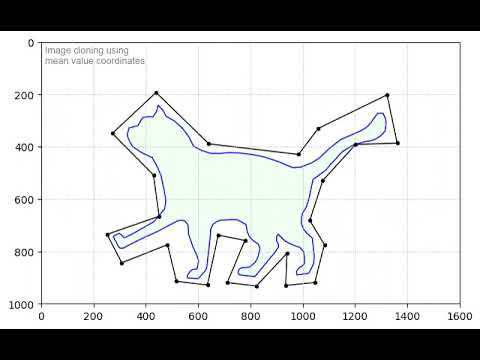

In [2]:
#@title Animation using Mean Value Coordinates { display-mode: "form" }
# @markdown This is a 40 seconds video Inspired by David
# @markdown Austin's paper
# @markdown "Moving Remy in Harmony: Pixar's Use of Harmonic Functions"
YouTubeVideo("OnGSuGOJzg0", width=640, height=397)

* The two main methods for acomplishing this scheme
  are
  1. *Gradient domain techniques* (such as
  the *Poisson cloning* method)

  2. *Coordinate-based techniques* which use the cage
     for defining a coordinate that is used to describe
     our animation characers as a function of
     the cage vertices.
     When the cage moves, our charater is recomputed
     from the new cage vertices.

* The first method is very heavy computationally and
  thus less and less popular, while the second method
  has gained more momentum as it is much faster and
  generates more
  pleasing deformations to the character.

* We will present the three main techniques of the second
  method, but most of the effort will fall on
  the third technique which deploys Harmonic functions:
  1. **Barycentric coordinates**
  2. **Mean value coordinates**
  3. **Harmonic coordinates**

* The following YouTube video contains more details about
  this method in the 3D case
  * https://www.youtube.com/watch?v=egf4m6zVHUI
* You can also play it here if you entered the
  **Google Colab** mode.

In [ ]:
#@title Harmonic coordinates explained
#@markdown This videos explains a new deformation technique to pixar animators. the video was taken from a pixar patent site
YouTubeVideo("egf4m6zVHUI", width=720, height=480)

## Barycentric Coordinates
* Given a triangular cage  
$
C = \{(x_1,y_1), (x_2,y_2), (x_2,y_3)\}
$

<IMG src="https://samyzaf.com/cfproj/cage1.jpg" width=400 align="center"/>

* The barycentric coordinates method for this cage
  is a linear transformation
$$
\beta(x,y) = (d_1,d_2,d_3)
$$
  which assigns to each point
  $(x,y)$ in the 2-dimensional plane $\mathbb{R}^2$
  three coordinates $(d_1,d_2,d_3)$.

* Each of the components $d_1$, $d_2$, $d_3$ is obtained
  by a corresponding linear function
  $\beta_1(x,y)$, $\beta_2(x,y)$, $\beta_3(x,y)$  
$
d_1 = \beta_1(x,y) = a_1 x + b_1 y + c_1
\\
d_2 = \beta_2(x,y) = a_2 x + b_2 y + c_2
\\
d_3 = \beta_3(x,y) = a_3 x + b_3 y + c_3
$  
which in matrix notation is equivalent to  
$
\beta(x, y)
=
\begin{bmatrix}
d_1 \\ d_2 \\ d_3
\end{bmatrix}
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ y_1 \\ 1
\end{bmatrix}
$

* The main two requirements from this map are
  * Every point $(x,y)$ in the plane is the linear
     combination of the cage vertices where
     the barycentric coordinates are the coefficients
$$
(x,y) = d_1 \cdot (x_1,y_1) + d_2\cdot (x_2,y_2) + d_3\cdot (x_3,y_3)
$$

  * The three vertices of the cage must satisfy
$$
\beta(x_1,y_1) = (1,0,0)
\\
\beta(x_2,y_2) = (0,1,0)
\\
\beta(x_3,y_3) = (0,0,1)
$$



### Exercise suggestion
Assuming that our cage is a non-degenerate triangle
* Prove that there is a unique solution for $\beta$
* Find a solution for $\beta$ in terms of $x_1$, $y_1$.

## Solution
We need to solve three 3x3 linear systems  
$
\begin{align}
\beta(x_1, y_1)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ y_1 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 0 \\ 0
\end{bmatrix}
\\[2ex]
\beta(x_2, y_2)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_2 \\ y_2 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 1 \\ 0
\end{bmatrix}
\\[2ex]
\beta(x_3, y_3)
=
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_3 \\ y_3 \\ 1
\end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 1
\end{bmatrix}
\end{align}
$

For programmers it is also useful to note that the above
three systems are equivalent to the following matrix
equation

$
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$

Thus  
$
\begin{bmatrix}
a_1 & b_1 & c_1 \\
a_2 & b_2 & c_2 \\
a_3 & b_3 & c_3 \\
\end{bmatrix}
=
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
^{-1}
$

Thus  
$
\beta(x,y)
=
\begin{bmatrix}
x_1 & x_2 & x_3 \\
y_1 & y_2 & y_3 \\
1 & 1 & 1 \\
\end{bmatrix}
^{-1}
\begin{bmatrix}
x \\ y \\ 1
\end{bmatrix}
$

* Experienced **Python/Numpy** programmers can turn
  this into a 4 lines method which resolves this problem.

* Indeed, this is the method we use for
  solving the following examples

```python
    def get_bary_coords_map(cage):
        A = [point + (1,) for point in cage]
        M = linalg.inv(A).transpose()
        map = lambda x,y: np.dot(M,[x,y,1])
        return map
```

* This method returns a function object which is
  the barycentric transformation for our cage.
* See the examples below.

## Python commands
* Some experiments with some ideas for studets
  to play with

* The Python code can be further simplifies if desired
  (so students can test more ideas by themselves)

* Some of the methods we use:
  * **get_bary_coords_map(cage1)** - obtain the barycentric
    coordinates transformation for a given **cage** (only
    triangular cage is supported of course)
  * **clone(coords, cage)** - Apply the batycentric coords
    on a new cage to obtain the new point in a new cage (the
    coords were computed in a previous cage)
  * **draw_cage** - draw the cage on canvas
  * **draw_poly** - draw a polygon from its coordinate list
  * **draw_oval(x0,y0,a,b)** - draw an ellipse centered
    at `(x0,y0)` and axis `a`, `b`.
  * **draw_curve(coords_list)** - draw an arbitrary
    curve from its coordinate list (the diffrence from
    **draw_poly** is that vertices are not drawn)

### Example
* In our first example we compute the barycentric
  coordinates of a single point `p=(x1,y1)=(6,4)`
  inside the triangle `[(3,1), (5,6), (9,2)]`

* Then we show how to visualize the cage and the point
  on a
  [matplotlib](https://matplotlib.org)
  canvas.

In [3]:
cage1 = [(3,1), (5,6), (9,2)]
bary_coords = get_bary_coords_map(cage1)
p = x1,y1 = 6,4
coords = bary_coords(x1, y1)
print(f"The barycentric coordinates of {(x1,y1)} = {coords}")

The barycentric coordinates of (6, 4) = (0.14285714285714257, 0.5357142857142857, 0.3214285714285715)


* To validate that these are indeed the correct
  Barycentrict coordinates of `p` we need to
  verify that the dot product
  of the vector
  `(0.14285714, 0.53571429, 0.32142857)`
  with the cage vertices yield the point `p`  
$
\qquad
0.14285714\cdot (3,1)
+ 0.53571429\cdot (11,10)
+ 0.32142857\cdot (9,2)
=
(5.999999999999997, 3.999999999999999) \approx p
$  
This is of course a good enough approximation.

* This calculation can be done more simply
  with the **clone(coords, cage)**
  command.

In [ ]:
clone(coords, cage1)

In [ ]:
draw_cage(cage1)
draw_point(x1, y1, color="red")
show_plot()

* Next, we modify our cage by replacing the vertex
  `(5,6)` with `(11,10)`.
  The new cage is called **cage2**.
  To find out what happens to our point `p`
  under this transition, we apply the
  command **clone(coords, cage2)**

In [ ]:
cage2 = [(3,1), (11,10), (9,2)]
draw_cage(cage2)
x2,y2 = clone(coords, cage2)
print(f"Cloned point = ({x2}, {y2})")
draw_point(x2, y2, color="red")
show_plot()

* In the next example we draw a circle inside `cage1`
  and then see what happens to it when we move to `cage2`.

* We use the command **draw_oval(x0, y0, a, b)**
  which draw an ellipse centered at `(x0,y0)` with
  radii `a`, `b`.

In [ ]:
cage1 = [(3,1), (5,6) ,(9,2)]
draw_cage(cage1)
circle = draw_oval(6,3,1,1)
show_plot()

In [ ]:
bary_coords = get_bary_coords_map(cage1)
coords_list = bary_coords(circle)

* Now we moved the top vertex (5,6)
  to a new location (11,10).
* Then we calculate the effect of this cage change
  on our circle.

In [ ]:
cage2 = [(3,1), (11,10), (9,2)]
draw_cage(cage2)
cloned_set = clone(coords_list, cage2)
draw_curve(cloned_set)
show_plot()

* In the next example we draw a man figure inside **cage1**
  and then see how it is cloned into **cage2**.

* This time our
  [man figure](https://samyzaf.com/cfproj/man1.svg)
  features a polygon
  with 28 points, therefore we use a
  [Scalable Vector Graphics \(SVG\)](https://en.wikipedia.org/wiki/SVG) file for de

* [SVG](https://en.wikipedia.org/wiki/SVG)
  is now the standard image format for defining two-dimensional graphics, which later will also enable
  us to create and edit polygons for our
  project by using software tool such as
  [Inkscape](https://inkscape.org)

* Please install [inkscape](https://inkscape.org)
  and use it for editting the following example
  in this notebook.

* You can download the cat and man svg files
  from  
  https://samyzaf.com/cfproj/files.zip

* Inkscape tutorials
  * [Inkscape Tutorials Playlist](https://www.youtube.com/watch?v=8f011wdiW7g&list=PLqazFFzUAPc5lOQwDoZ4Dw2YSXtO7lWNv)
  * [Inkscape Explained: Editing Nodes, Paths & The Bezier Pen](https://www.youtube.com/watch?v=dVjJfx2oc5w)
  * [InkScape - Tutorial for Beginners in 13 MINUTES! ](https://www.youtube.com/watch?v=rFYQW2DCM2I)

In [ ]:
url = "https://samyzaf.com/cfproj/man1.svg"
man = read_polygon(url, tag="man")
cage1 = read_polygon(url, tag="cage")
print(cage1)

* To get an impression on how the man character polygon
  looks like, lets print it

In [ ]:
print(man)

In [ ]:
draw_cage(cage1)
draw_poly(man)
show_plot()


* Now we compute the Barycentric coordinates of
  our **man figure** with respect to
  our initial cage **cage1**.

* Notice that we first need to generate
  the Barycentric coordinates transformation,
  which we can apply on any set of coordinates.

In [ ]:
bary_coords_map = get_bary_coords_map(cage1)
coords_list = bary_coords_map(man)

* You may use inkscape tool for editting our polygon
  (which you can download to your pc)
  and generate more cage examples

* But you can also modify a point or two of **cage1**
  and obtain a new cage to play with as we did
  in the next example.

In [ ]:
cage2 = [(314,1143), (1000,218), (1770,850)]
draw_cage(cage2)
cloned_points = clone(coords_list, cage2)
draw_poly(cloned_points)
show_plot()


* Please install and use the
  [InkScape](https://inkscape.org) application
  to edit the cage and test different types of cages.

In [ ]:
cage3 = [(314,1143), (1000,218), (1770,650)]
draw_cage(cage3)
cloned_points = clone(coords_list, cage3)
draw_poly(cloned_points, fill=True, facecolor="aliceblue");
show_plot()

## Mean Value Coordinates
* Barycentric coordinates exist **only** for
  triangular cages! This is of course a serious
  limitation, since even 2D animation characters require
  cages that are more complex (as we see in the
  following figure).

<IMG src="https://samyzaf.com/cfproj/cat1a.jpg" width=400 align="center"/>

* Mean value coordinates are a generalization of
  Barycentric coordinates to polygons
  of any order $m$ (number of vertices)
  as seen in the following figure.

<IMG src="https://samyzaf.com/cfproj/mean1.jpg" width=400 align="center"/>

* The formal definition of mean value is roughly as follows.
* Let $\mathbf{p}$ a point inside our cage (see figure),
  and let $\alpha_0$, $\alpha_1$, $\ldots$, $\alpha_{m-1}$
  the angles generated by joining the point $\mathbf{p}$
  to the cage vertices.
* Let $\beta_i$ be the Barycentric coordinates map
  corresponding to the triangle
  $\Delta(\mathbf{p},\mathbf{p}_i,\mathbf{p}_{i+1})$

* For each $i$, the circle $\text{arc}(\alpha_i)$
  correponding to angle $\alpha_i$ is included in the
  triangle
  $\Delta(\mathbf{p}, \mathbf{p}_i,\mathbf{p}_{i+1})$,
  and therefore every point $\mathbf{q}$ on this arc
  has Barycentric coordinates
  $\beta_i(\mathbf{q})$.

* If we take the sum of all these value on
  $\mathrm{arc}(\alpha_i)$,
  we get the definition of the mean value coordinates  
  $
  \qquad
  \lambda_i(\mathbb{p})
  =
  \int_{q\in\text{arc}(\alpha_i)} \beta_i(q)
  $

* We will not delve into the details of this special
  contour integral since it is not practical for
  computing the mean value coordinates.

* Instead, we use an equivalent simpler formula
  (see paper 4 above) for doing this.
  You can find more information on this integral in
  the 4 papers mentioned above if you like.

* The simplified formula from paper 4 (see above) is  
$
\qquad
\lambda_i(\mathbb{p})
=
\frac{w_i}{\sum_{j=0}^{m-1} w_j},
\qquad
w_i = \frac{\tan(\alpha_{i-1}/2) + \tan(\alpha_i/2)}{\|p_i - p\|}
$

### Example
* This time we are using a **Cat Character**, represented
  by a **152 vertices** polygon.

* So instead of displaying the full 152 coordinates
  in a cell we simply read them from
  a file which we store on our website:

In [ ]:
url = "https://samyzaf.com/cfproj/cat1.svg"
cat = read_polygon(url, tag="cat")
cage1 = read_polygon(url, tag="cage1")
print(cat)
print(f"Number of vertices = {len(cat)}")

* The initial cage (cage1) consists of 25 vertices.

* You may download all SVG files from  
  https://samyzaf.com/cfproj/files.zip

In [ ]:
print(cage1)
print(f"Number of vertices = {len(cage1)}")

* Of course, more important is that we can actually draw
  these polygons

In [ ]:
draw_curve(cat, fill=True, facecolor="aliceblue")
draw_cage(cage1)
show_plot()

* The following procedure **get_mean_value_coords_map**
  builds and returns the mean value coordinates map
  for a given cage.

* In other words, it generates for us the method we
  need to apply on a point $(x,y)$ for computing
  its mean value coordinates!

In [ ]:
mean_coords = get_mean_value_coords_map(cage1)

* For example, lets see what if we run it on the
  point $\mathbb{p} = (800,600)$ which is obviously inside
  our cage.
* It should return 27 coordinates! Since our cage
  has 27 vertices!

In [ ]:
coords = mean_coords(800,600)
print(coords)

* To validate our **mean_coords** procedure for this
  point we need to check that the dot product
  of the coords vector and the cage polygon
  yield the point $(800,600)$  
$
(800,600)
=
\sum_{i=0}^{26} \mathrm{coords}[i] \cdot \mathrm{cage1}[i]
$

* Note that the cage1 vector is viewed as a vector of
  27 tuples $(x_i,y_i)$, $i=0,1,2,\ldots,26$.

* Within our Python code, this is acomplished
  by the **clone** procedure

In [ ]:
x,y = clone(coords, cage1)
print(x,y)

* This looks pretty good for our project.

* To apply this map on all the cat points, we
  apply the **mean_coords** function on
  the list **cat** (polygon points).

* The **mean_coords** procedure is applied on all
  points $(x,y)$ in the cat polygon, and
  we get a list of all 152 mean value coordinates
  corresponding to the 152 points of the cat polygon.

In [ ]:
coords_list = mean_coords(cat)

* If you want to see how this list looks like
  run the following code (not recommended, it's too long!)

In [ ]:
for coords in coords_list:
  print(coords)

* Next we want to modify our cage and see what
  happens to our cat figure as a result of it.

* We have built three additional examples of cage (with
  a simple drawing application) and stored them
  in our website for you to use.

* For that purpose we need to clone all the 152 cat point
  with respect to the new cage.
  
* We built a Python procdure **Clone** which
  does this smoothly (if you're a Python programmer you're
  welcome to peak at the package
  [code](https://samyzaf.com/cfclon-33.zip).

In [ ]:
url = "https://samyzaf.com/cfproj/cat2.svg"
cage2 = read_polygon(url, tag="cage2")
Clone(cage2, coords_list, fill=True, facecolor="aliceblue")
show_plot()

In [ ]:
url = "https://samyzaf.com/cfproj/cat3.svg"
cage3 = read_polygon(url, tag="cage3")
Clone(cage3, coords_list, fill=True, facecolor="aliceblue")
show_plot()

In [ ]:
url = "https://samyzaf.com/cfproj/cat4.svg"
cage4 = read_polygon(url, tag="cage4")
Clone(cage4, coords_list, fill=True, facecolor="aliceblue")
show_plot()

* The last clone does not look too good.
  The reason is of course a poor choice of cage.
  In order to get a naturally looking character clone one
  must make sure to handle the cage appropriately.
* Here are the last 4 figures grouped together
  for a better view

<IMG src="https://samyzaf.com/cfproj/mean_figs2.png" width=800 align="center"/>

* With more more advanced Python tools
  it is possible to generate new cages from this four
  by interpolation, and the make an animation
  that shows how the cat charater is moving.

* Notice that in frames 3 and 4, the right leg has
  shrinked disproportionally. This is a well
  known anomaly with respect to mean value coordinates.
  This anomaly is solved by switching to a better
  coordinates system: namely Harmonic Coordinates

In [ ]:
YouTubeVideo("OnGSuGOJzg0", width=640, height=397)

## Harmonic Coordinates
* Harmonic coordinates are computed by applying harmonic
  functions on a given point (one for each vertex of
  our **initial cage**).
* Harmonic functions are defined as solutions to the
  **Laplace Equation**  
  $\qquad
  u_{xx} + u_{yy} = 0
  $  
  with initial conditions over the boundary of a 2D
  domain in $\mathbb{R}^2$.
* This is a classical **Partial Differential Equation**
  which is usually covered in every course on partial differential equations.
* In introductory PDE courses, students learn to solve this
  equation over a rectangle or circle domains
  with relatively simple boundary conditions, and obtain
  solutions in the form of
  infinite 2d Fourier series.
* In our case, we need to find solutions for this equation
  over polygonal domains (cages).
* Contrary to Barycentric and mean value coordinates,
  we do do not have explicit form formulas for computing harmonic coordinates except maybe for a small
  number of cage shapes
  like rectangles or disks which require an infinite 2-dimensional Fourier series.
  In most cases the only way to compute harmonic coordinates is by discrete finite elements approximation algorithms which usually require high computation power in order to achieve
  modest precision levels.

## Basic Harmonic Functions over a Polygon
* Given a polygonal cage  
  $\qquad
  C = \{(x_0,y_0), (x_1,y_1), (x_2,y_2)\ldots, (x_{n-1},y_{n-1})\}
  $  
  we want to define how we assign **harmonic coordinates**
  to every point $p(x,y)$ inside the cage.

  <figure>
  <IMG src="https://samyzaf.com/cfproj/har4b.jpg" width=400 align="center"/>
  <figcaption><small>
  Polygonal cage with vertices $p_i=(x_i,y_i)$,
  $i=0,1,2,\ldots,n-1$
  </small></figcaption>
  </figure>

* Our cage has $n$ vertices, so we need to define
  $n$ coordinates!

* For that purpose we define
  $n$ **Basic Harmonic Functions**,
  one for each cage vertex.

* For every cage vertex $(x_i,y_i)$ we define a
  **Basic Harmonic Function** $h_i(x,y)$ with the
  following boundary properties
  * $h_i(x_i,y_i) = 1$
  * For evey $j\neq i$, $h_i(x_j,y_j) = 0$
  * $h_i(x,y)$ is continuous and linear on
    every cage edge.

* In other words, $h_i(x,y)$ is zero on all cage edges
  except for the two edges that come out of the vertex
  $(x_i,y_i)$,
  on which it is "sliding" from $1$ to $0$, as can be seen
  the simple example below.

  <figure>
  <IMG src="https://samyzaf.com/cfproj/har3.jpg" width=400 align="center"/>
  <figcaption><small>
  Boundary conditions for $h_0(x,y)$ on over the boundary
  <BR>
  of the square cage
  $C=\{(0,0),(4,0),(4,4),(0,4)\}$
  </small></figcaption>
  </figure>

* The existence and uniqueness theorem for the Laplace
  PDE (with Dirichlet boundary conditions) guarantees
  that there is **exactly one** harmonic function $h_i(x,y)$
  over the full cage (interior and boundary)
  which satisfies these conditions.

* **Theorem (Cloning):**
  Let $(d_0,d_1,d_2,\ldots,d_{n-1})$
  be the harmonic coordinates of a point $p$
  inside a polygonal cage  
  $\qquad
  C = \{(x_0,y_0), (x_1,y_1), (x_2,y_2)\ldots, (x_{n-1},y_{n-1})\}
  $  
  Then  
  $\qquad
  \begin{array}{rcl}
  p &=& (d_0,d_1,d_2,\ldots,d_{n-1}) \cdot C
  \\
    &=& d_0 \cdot (x_0,y_0) + d_1 \cdot (x_1,y_1) + d_2\cdot (x_2,y_2) + \cdots + d_{n-1} \cdot (x_{n-1},y_{n-1})
  \end{array}
  $  

* The last formula is sometimes called
  **the cloning formula**, since it shows how
  to clone the point $p$ from its coordinates with respect
  to any change of the cage $C$.
  

## The ScanLine Algorithm
* The first step of our story starts with an algorithm
  for classifying grid pixels to three types
  1. Internal pixels
  2. External pixels
  3. Boundary pixels

* The next code shows how to build a pixel database
  (named "cat_db") for our cat **initial** cage1.

* In the first two commands we read the cat and cage
  polygons.
* The third command builds the pixels database.
  * Its first argument is the database name.
  * The second argument is the polygon for which
    we want to build a pixels databse.
  * The third argument is the resolution measure:
    how many pixels enter in polygon width or height
    (on the smallest of both).

* The fourth command draws the pixels grid.
  The `bcolor` argument is the boundary pixels color,
  and the `fcolor` argument is the internal pixels
  color.

Building database: Fri Dec 22 15:51:40 2023
reg.depsilon = 1e-18
reg.harmonlimit = 20000
reg.box.dthresh = 1e-12
reg.box.harmonlimit = 15000
Progress: 100%   
Time: 1.18 seconds
reg.dthresh = 9.708000000000001e-16
Done building database: Fri Dec 22 15:51:41 2023
Build time = 1.211


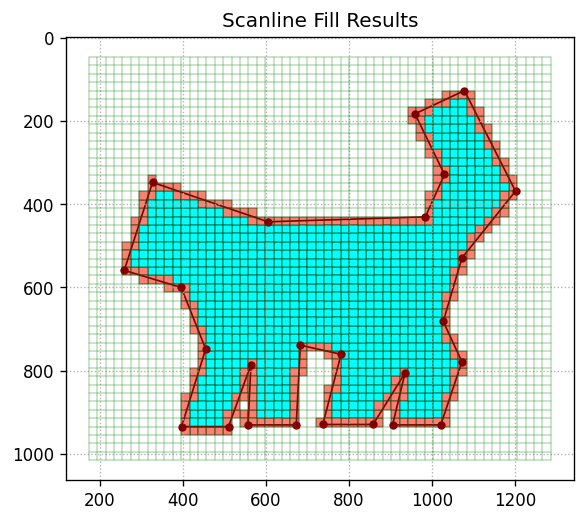

In [4]:
cat1 = read_polygon("https://samyzaf.com/cfproj/cat1.svg", tag="cat")
cage1 = read_polygon("https://samyzaf.com/cfproj/cat1.svg", tag="cage")
build_db("cat_db", cage1, 40)   # pixel resolution = 40
scanline_plot(plotgrid=True, bcolor="salmon", fcolor="cyan")

* To get a beter mesh grid resolution we can increase
  the resolution factor to 70.
* This time we draw only internal and boundary pixels.
* Here is how the result looks like:

Building database: Fri Dec 22 15:51:55 2023
reg.depsilon = 1e-18
reg.harmonlimit = 20000
reg.box.dthresh = 1e-12
reg.box.harmonlimit = 15000
Progress: 100%   
Time: 2.75 seconds
reg.dthresh = 9.01457142857143e-16
Done building database: Fri Dec 22 15:51:57 2023
Build time = 2.797


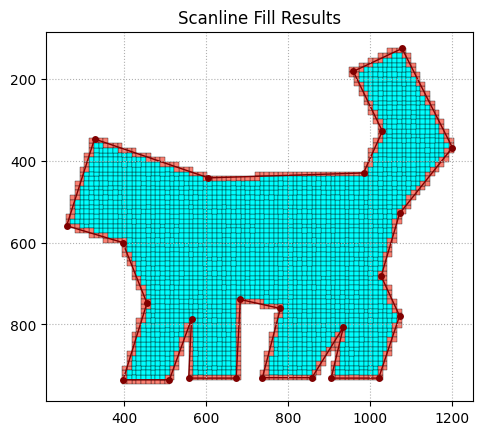

In [5]:
build_db("cat_db", cage1, 70)
scanline_plot(bcolor="salmon", fcolor="cyan")

* If you need to, you can zoom in to particular areas of
  this plot by using the `xlim` and `ylim` arguments
  of the `scanline_plot` command.
* For example we can take a closer look at the front legs area.

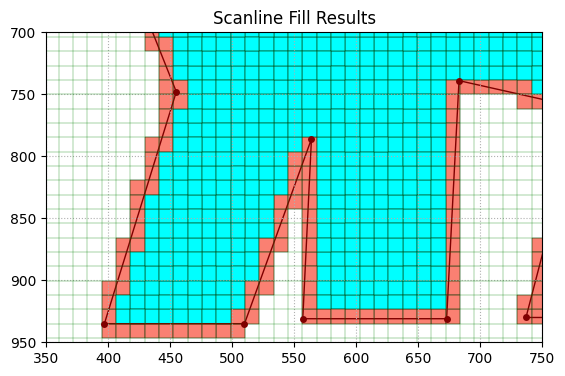

In [6]:
scanline_plot(xlim=(350,750), ylim=(700,950), plotgrid=True, fcolor='cyan', bcolor='salmon')

## Basic Harmonic Matrices
* After choosing a fine pixels grid, we need to build
  our basic harmonic functions.

* To be precise, these are not functions in
  the usual math analysis sense. They are
  better described as **basic harmonic matrices**,
  since these are discrete value assignments on our
  discrete scanline grid.
* We will need $n$ such matrices corresponding
  to our cage $n$ vertices.



In [7]:
set_outcell_height(300)
build_elementary_matrices()

Building elementary matrices Fri Dec 22 15:52:23 2023
Matrix 0:
Progress: 100%   
Time: 1.86 seconds
Progress: 0%   Stopping hsmooth gstep=8 at avg change = 0.0, k = 0.50%
Progress: 1%   Stopping hsmooth gstep=4 at avg change = 0.0, k = 1.50%
Progress: 4%   Stopping hsmooth gstep=2 at avg change = 1.8412719605213713e-16, k = 4.50%
Progress: 17%   Stopping hsmooth gstep=1 at avg change = 5.39221101467457e-16, k = 17.00%
harmon_time = 13.233
Matrix 1:
Progress: 100%   
Time: 0.86 seconds
Progress: 0%   Stopping hsmooth gstep=8 at avg change = 0.0, k = 0.50%
Progress: 1%   Stopping hsmooth gstep=4 at avg change = 0.0, k = 1.50%
Progress: 4%   Stopping hsmooth gstep=2 at avg change = 2.955985410355712e-16, k = 4.50%
Progress: 17%   Stopping hsmooth gstep=1 at avg change = 6.714851595830188e-16, k = 17.00%
harmon_time = 23.152
Matrix 2:
Progress: 100%   
Time: 1.24 seconds
Progress: 0%   Stopping hsmooth gstep=8 at avg change = 0.0, k = 0.50%
Progress: 1%   Stopping hsmooth gstep=4 at avg c

* After building our scanline database and harmonic matrices
  we can save it into a database file to disk.
* Later we can simply load it quickly back to memory with
  the `load_db` command and save cpu time.
* The db file name is "cat_db.db" as the name of our
  db above.

In [8]:
save_db()

Saved registry to file: ./cat_db.db


* We now can calculate Harmonic coordinate of any given
  point with respect to our initial cage.

In [9]:
reg.log.state = "disabled"   # We disable logging to avoid too much text prints
p = x,y = 805.0,607.0
coords = harmonic_coordinates(x, y);
print(coords)

[0.01551466140523029, 0.01711822734421263, 0.002360291069441145, 0.008007109704465522, 0.20299724533043065, 0.18401757883016445, 0.0024549604490253967, 5.736417495962195e-05, 0.0001516189920238356, 0.00298028051057053, 0.06031781043883892, 0.09403447068310063, 0.01847760939550264, 0.004328305462508966, 0.0019267116494959277, 0.04937135687444122, 0.015650840367067934, 0.009449611344866566, 0.16251318950274146, 0.1263214014709776, 0.003678043894793639, 0.0010275817945305785, 0.015166309082265749, 0.0014259749974290512, 0.0006514452241693539]


* Notice that the harmonic coordinates of the point $p$
  consists of a list of 25 real numbers! As the
  number of our cage vertics.
* Now we clone our point $p=(805,607)$ from its
  harmonic coordinates in our initioal cage,
  and see if get back the point.
* Expectedly, we'll loose some precision, since our grid
  is not too fine.

In [10]:
q = clone(coords, cage1)
print(p)
print(q)

(805.0, 607.0)
(806.8282866745429, 611.419569146483)


* `q=clone(p)` within the initial cage, should result
   ideally with `p` but out\r approximation algorithm
   yields a good enough close result.
* We lost 0.22% precision on the x coordinate,
  and 0.72% precision on the y coordinates.
* This is good enough and does not have real effects on
  the total character cloning as we'll see shortly.
* First, lets compute the list of harmonic coordinates
  of our initia cat: this is going to be a long
  list of 152 sets of coordinates,
  so in total we'll have $152{\times}25=3800$ real
  numbers.

In [12]:
coords_list = harmonic_coordinates(cat1)

* We now load our second cage, and clone there our cat1
  figure.
* Then we draw this cage, clone cat1, and draw the new
  cat2 clone
* For illustration we also add a fill color

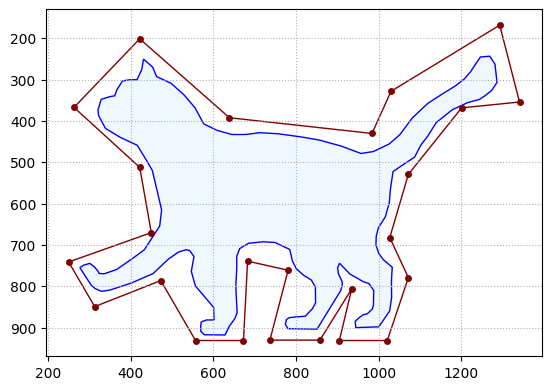

In [13]:
url = "https://samyzaf.com/cfproj/cat2.svg"
cage2 = read_polygon(url, tag="cage2")
draw_cage(cage2)
cat2 = clone(coords_list, cage2)
draw_curve(cat2, fill=True, facecolor="aliceblue", linewidth=1)
show_plot()

* Next we load our third cage (`cage3`).
* We use the command **Clone** which conveniently
  computes the clone and also draw it.

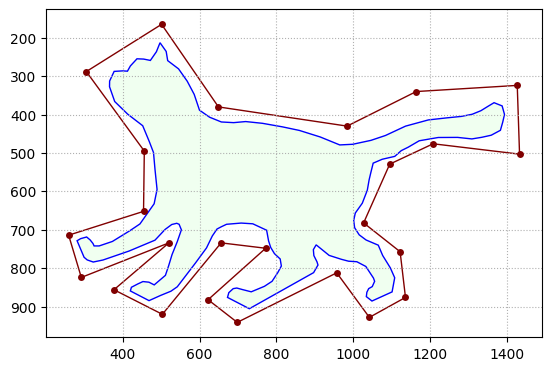

In [14]:
url = "https://samyzaf.com/cfproj/cat3.svg"
cage3 = read_polygon(url, tag="cage3")
Clone(cage3, coords_list, fill=True, facecolor="honeydew")
show_plot()

* We can now see that the problem with the back leg
  is fixed with harmonic coordinates.
* In the right figure we see that cat cloning
  using mean value coordinates distorts the cat leg
  (see red circle).
* The left figure shows cat cloning using
  harmonic coordinates.

<A href="https://www.youtube.com/watch?v=hWWOiF-G3nQ">
<IMG src="https://samyzaf.com/cfproj/hcat3.jpg" width=300 align="center"/></A>
<A href="https://www.youtube.com/watch?v=hWWOiF-G3nQ">
<IMG src="https://samyzaf.com/cfproj/cat3c.jpg" width=300 align="center"/></A>

* We will conclude with infographic utilities
  for visualizing solutions for harmonic functions
  over a rectangle
  and visualizing elementary harmonic matrices.


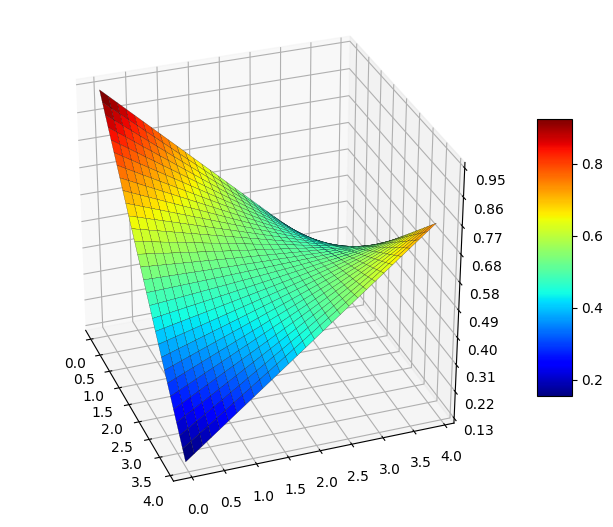

In [31]:
boundry_conditions = {
    (0,0): 0.95,
    (0,4): 0.2,
    (4,0): 0.1,
    (4,4): 0.8,
}
ax = solve_rectangle(boundry_conditions, ncols=30, nrows=30)
ax.view_init(elev=30, azim=-20, roll=0)
plt.show()


* Here is a solution to Laplace equation
  $u_{xx} + u_{yy} =0$
  with a linear boundary conditions  
  $\qquad
  \left\{
    \begin{array}{rcl}
    u(1,1) &=& 0.8 \\
    u(1,2) &=& 0.1 \\
    u(2,1) &=& 0.2 \\
    u(2,2) &=& 0.9
    \end{array}
  \right.
  $  

  <IMG src="https://samyzaf.com/cfproj/har6b.jpg" width=400 align="center"/>

* The next utility show how visualize an elemntary
  harmonic matrix as a colmap of blue color shades.
* The `res` parameter is for grid **resolution**.
* The `index` parameter is for the index of the
  elemntary harmonic matrix.
* The cage has 25 elemntary matrices and we draw
  the fist one `index=0`.

Progress: 100%   
Time: 1.20 seconds
Progress: 100%   
Time: 0.27 seconds
Progress: 13%   

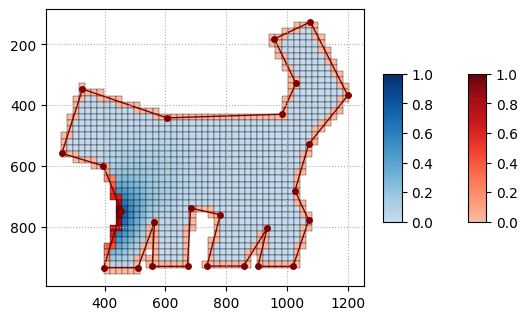

In [32]:
url = "https://samyzaf.com/cfproj/cat1.svg"
cage = read_polygon(url, tag="cage")
res = 40
index = 0
draw_harmonic_colormap(cage, res, index)

* Note how the values of $h_0(x,y)$ are getting close to
  $1$ when the pixels are closer to vertex $0$.
* We can increas the grid resolution, but then it take
  more computation time

Progress: 100%   
Time: 2.17 seconds
Progress: 100%   
Time: 0.86 seconds
Progress: 20%   

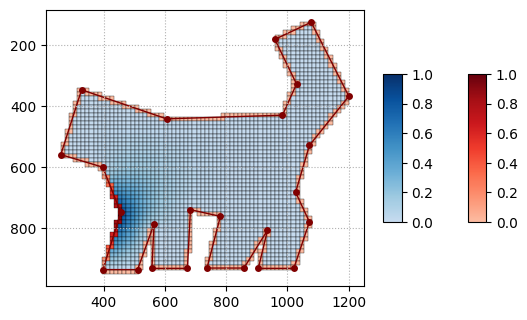

In [34]:
res = 60
index = 0
draw_harmonic_colormap(cage, res, index)

* It is possible to zoom in to specific area of the colormap
  by using the `xlim` and `ylim` flags.

Progress: 100%   
Time: 3.47 seconds
Progress: 100%   
Time: 1.03 seconds
Progress: 33%   

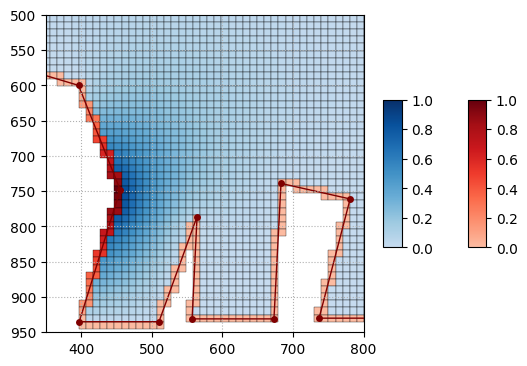

In [36]:
res = 80
index = 0
draw_harmonic_colormap(cage, res, index, xlim=(350,800), ylim=(500,950))

* Elementary harmonic matrices can also be viewed
  in 3D space

Progress: 100%   
Time: 2.20 seconds
Progress: 100%   
Time: 0.60 seconds
Progress: 26%   

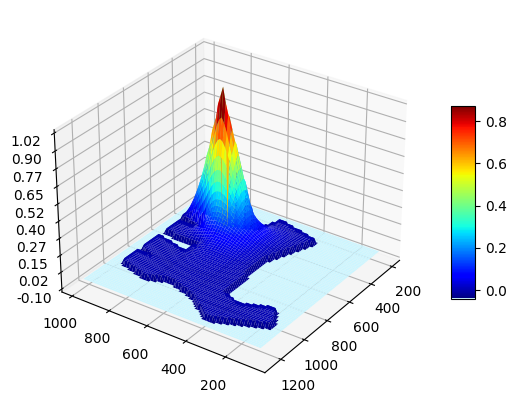

In [37]:
res = 60
index = 0
ax = draw_3d_elementary_matrix(cage, res, index)
ax.invert_yaxis()
ax.view_init(elev=30, azim=35, roll=0)
plt.show()

* This 3D surface can be viewed from different angles
  by supplying appropriate parameters
  to the `view_init` method.

Progress: 100%   
Time: 3.04 seconds
Progress: 100%   
Time: 0.74 seconds
Progress: 11%   

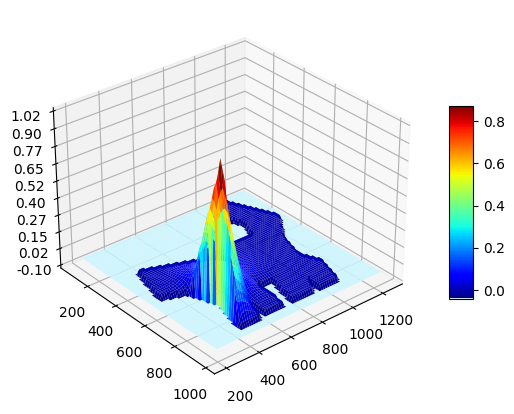

In [39]:
res = 60
index = 0
ax = draw_3d_elementary_matrix(cage, res, index)
ax.invert_yaxis()
ax.view_init(elev=30, azim=230, roll=0)
plt.show()

* It takes about 10 hours to build a high resolution
  grid of level `res=192`.
* However, once you build one, you can save it
  with the `save_db` command,
  and later load it with tha `load_sb` command
* Here is a 192 high resolution grid database
  which we built and saved in our web site.
  It can be loaded and use instantly!

In [40]:
dbname = "https://samyzaf.com/cfproj/cat192a.db"
load_db(dbname)
reg.log.state = "disabled"  # Quite log

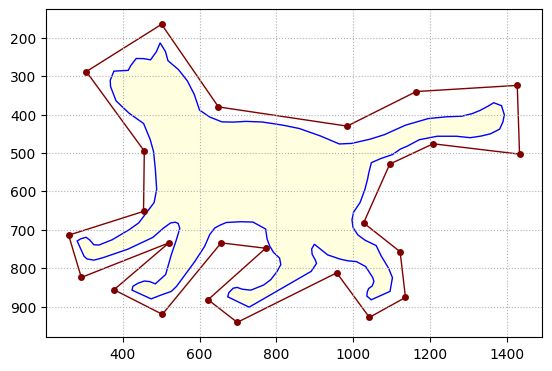

In [43]:
url = "https://samyzaf.com/cfproj/cat3.svg"
cat = read_polygon(url, tag="cat")
cage3 = read_polygon(url, tag="cage3")
coords_list = harmonic_coordinates(cat)
Clone(cage3, coords_list, fill=True, facecolor="lightyellow")
show_plot()